In [1]:
# Use PyTorch to build neural networkabs
# Inspired by pytorch workshop conducted in MSBD 5001 course

# Import required packages
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
from torch.nn.init import kaiming_uniform_
import matplotlib.pyplot as plt

In [2]:
# Import the yield data as pandas data frame (Note this is saved as a csv file in base working directory)
file_path = os.path.join(os.getcwd()) + '/'
file_name = 'Crop_Yields.csv'
yield_data = pd.read_csv(file_path + file_name)

In [3]:
# Create class to load dataset

class CustomImageDataset():
    def __init__(self, hist_dir, crop_yield_table, transform=None, target_transform=None):  
        self.hist_dir = hist_dir # References the directory for each given country where the data is stored
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = [] # For every year, yields a numpy array of dimension 576 x 29
        crop_yields = []
        for filename in os.listdir(hist_dir):
            filenames.append(filename)
            crop_yields.append(crop_yield_table[crop_yield_table.Year == int(filename[-8:-4])]['Cereal Yield'].values[0])
        self.filenames = filenames
        self.crop_yields =crop_yields
        
    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        hist_dir = os.path.join(self.hist_dir, self.filenames[idx])
        #hist = torch.from_numpy(np.load(hist_dir)).float()
        hist = np.load(hist_dir)
        if self.transform:
            hist = self.transform(hist).float()
        crop_yield = torch.from_numpy(self.crop_yields[idx].reshape(-1, 1)).float()
        return hist, crop_yield

In [4]:
from torchvision.transforms import Resize, ToTensor, Compose

# crop_dataset = CustomImageDataset("./kenya", crop_yield_table = yield_data, transform = ToTensor())
crop_dataset = CustomImageDataset("./kenya", crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((28,28))]))

# print(dataset.filenames)
# print(dataset.crop_yields)
# dataset[3]

In [5]:
crop_dataset[3] # Shows for a given tensor which consists of a pair of 1) array of binned histogram data; and 2) yield output

(tensor([[[9.2558e-03, 1.3343e-03, 3.7762e-04, 3.8769e-03, 3.7510e-03,
           1.2839e-02, 0.0000e+00, 3.7762e-04, 9.8181e-04, 0.0000e+00,
           0.0000e+00, 2.7021e-03, 3.6419e-03, 4.9846e-03, 7.6615e-03,
           5.1692e-03, 2.9538e-03, 6.4027e-03, 3.1888e-03, 0.0000e+00,
           2.0643e-03, 4.6237e-03, 1.0154e-03, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [6]:
crop_dataset[3][0].dtype

torch.float32

In [7]:
crop_dataset[3][1].dtype

torch.float32

In [8]:
crop_dataset[3][0].shape # For each binned histogram data, consists of 576 observations across 29 dimensions

torch.Size([1, 28, 28])

type of the image:  <class 'torch.Tensor'>
Yield: tensor([[1.2400]])


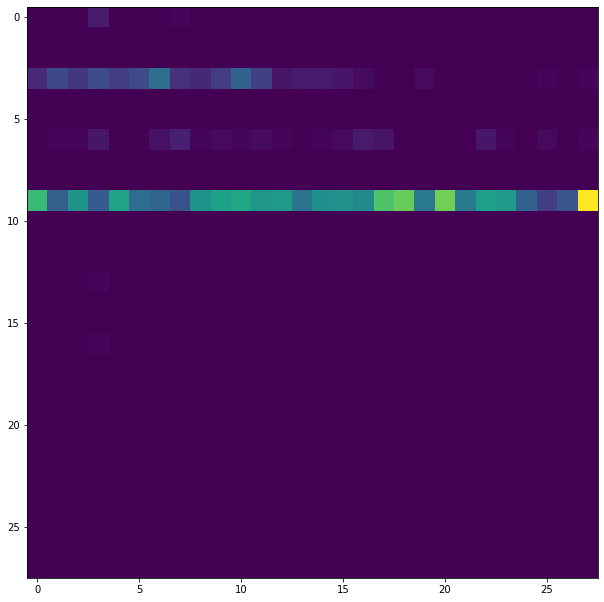

In [9]:
# Plot data for one sample pair
raw_image, crop_yield = crop_dataset[0]
figure = plt.figure()
figure.set_size_inches(18.5, 10.5)

print("type of the image: ", type(raw_image))

if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"Yield: {crop_yield}")

In [10]:
raw_image.shape

torch.Size([1, 28, 28])

In [11]:
# Now moving on to the machine learning model

In [12]:
dataloader = DataLoader(crop_dataset, batch_size=1, shuffle=False)

In [13]:
for feature, label in dataloader:
    print(f"Feature batch shape: {feature.size()}")
    print(label)
    print(f"Feature data type: {feature.dtype}")
    print(f"Label data type: {label.dtype}")

Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.2400]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7100]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.5100]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7400]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.6600]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.5800]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7700]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.3800]]])


In [14]:
# Check device used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [15]:
# Below is Neural Network as outlined in lecture notes

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        #self.linear1 = nn.Linear(28*28, 512)
        #self.linear2 = nn.Linear(512, 512)
        #self.linear3 = nn.Linear(512, 10)
        #self.relu = nn.ReLU()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        #x = self.linear1(x)
        #x = self.relu(x)
        #x = self.linear2(x)
        #x = self.relu(x)
        #logits = self.linear3(x)
        logits = self.linear_relu_stack(x)
        return logits

In [17]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

    
# Define model
class ConvNN(nn.Module):
    def __init__(self):
        super(ConvNN, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6,12,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(192, 512),
            nn.ReLU(),
            nn.Linear(512, 3)
        )

    def forward(self, x):
        logits = self.conv_stack(x)
        return logits
    

conv_model = ConvNN().to(device)
print(conv_model)

Using cuda device
ConvNN(
  (conv_stack): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): ReLU()
    (8): Linear(in_features=192, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=3, bias=True)
  )
)


In [21]:
model = NeuralNetwork()

In [22]:
print(model(crop_dataset[3][0].to(device)))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

In [ ]:
trainloader = dataloader # train_dataloader_resnet
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
print(model)

In [19]:
# Train model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    correct, train_loss = 0, 0 
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        print(f"Actual {y}")
        print(f"Predicted {pred}")

        # Backpropagation
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step() 
    train_loss /= num_batches
    return train_loss 

In [20]:
epochs = 500
for t in range(epochs):
    train_loss = train(trainloader, model, loss_fn, optimizer)
    # test_loss, test_acc = test(testloader, model, loss_fn)
    if t%1 == 0:
        print(f"Epoch {t}:")
        print(f"Avg loss: {train_loss:>8f}")
print("Done!")

NameError: name 'trainloader' is not defined